The best position found is:  [4 6 3 0 2 7 5 1]
The number non attacking pair of queens:  28.0


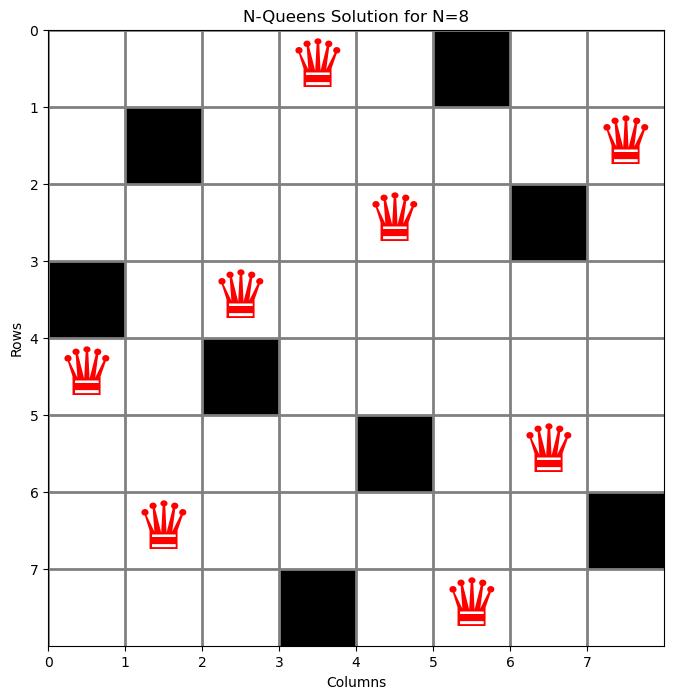

In [17]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def queens_max(position):
    n = len(position)
    attacking_pairs = 0
    for i in range(n):
        for j in range(i + 1, n):
            if (position[i] == position[j] or 
                abs(position[i] - position[j]) == abs(i - j)):
                attacking_pairs += 1
    # Total pairs - attacking pairs gives non-attacking pairs
    return (n * (n - 1)) // 2 - attacking_pairs

# Assign the objective function to "CustomFitness" method
objective = mlrose.CustomFitness(queens_max)

# Description of the problem
problem = mlrose.DiscreteOpt(length=8, fitness_fn=objective, maximize=True, max_val=8)

# Define decay schedule
T = mlrose.ExpDecay()

# Define initial state
initial_position = np.array([4, 6, 1, 5, 2, 0, 3, 7])

# Solve problem using simulated annealing
best_result = mlrose.simulated_annealing(
    problem=problem,
    schedule=T,
    max_attempts=500,
    max_iters=5000,
    init_state=initial_position
)

# Extract best state and best fitness from the result
best_state = best_result[0]  # The best state (positions of queens)
best_fitness = best_result[1]  # The number of non-attacking queens

# Print results
print('The best position found is: ', best_state)
print('The number non attacking pair of queens: ', best_fitness)

# Function to visualize the N-Queens solution
def plot_n_queens(positions):
    n = len(positions)
    board = np.zeros((n, n))

    # Place queens on the board
    for col, row in enumerate(positions):
        board[row, col] = 1  # 1 represents a queen

    plt.figure(figsize=(8, 8))
    plt.imshow(board, cmap='binary', extent=[0, n, 0, n])
    
    # Add grid lines
    plt.xticks(np.arange(0, n, 1))
    plt.yticks(np.arange(0, n, 1))
    plt.grid(color='gray', linestyle='-', linewidth=2)
    
    # Add queens
    for col, row in enumerate(positions):
        plt.text(col + 0.5, row + 0.5, '♛', fontsize=48, ha='center', va='center', color='red')

    plt.title(f'N-Queens Solution for N={n}')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.gca().invert_yaxis()  # Invert y-axis to match chessboard orientation
    plt.show()

# Visualize the solution
plot_n_queens(best_state)
